# Date-a Science

The purpose of our research project is to explore the specific attributes and characteristics which shape people’s decisions in their selecting their romantic partners. This study fits into the broader scope of psychological research which tests predefined notions of interpersonal relationships and their realistic outcomes.

**We aim to answer the following questions:**
- How much does race play a factor in the selection of potential partners? 
- How important are shared interests important in terms of relationship compatibility? 
- What are factors that affect the likelihood of going on a second date?
- Difference in male and female partner selection

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data.csv')

In [154]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Data Prep
The dataset that we acquired contained 195 columns. Much of this data does not help us answer our research questions, so we have filtered them out. We decided not to add any extra columns, because there was so much data available for us to explore our research questions.

Note : While asking oarticipants their desired attriputes in the opposite sex, here is how it was carried out.
>"We want to know what you look for in the opposite sex. 
Waves 6-9: Please rate the importance of the following attributes in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important):
Waves 1-5, 10-21: You have 100 points to distribute among the following attributes -- give more points to those attributes that are more important in a potential date, and fewer points to those attributes that are less important in a potential date.  Total points must equal 100."

Let's bring all rating to the same format

In [160]:
# select columns we want to keep
to_keep = ['iid', 'pid', 'gender', 'order', 'age', 'age_o', 'imprace', 'race', 'race_o', 'samerace', \
                 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', \
                 'shar_o',  'int_corr', 'dec', 'dec_o', 'match', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', \
                 'amb1_1', 'shar1_1', 'field_cd', 'wave']
data = data[to_keep]

In [161]:
attributes = ['attr', 'fun','sinc', 'amb', 'intel']
cols = [attr + '1_1' for attr in attributes]

# improvement to this code: 
# create a b-tree index for wave
for index, row in data.iterrows():
    wave = row['wave']
    if(wave >= 6.0 and wave <= 9.0):
        tot = sum(np.multiply(row[cols], [10]))
        div = tot/100.0
        row[cols] = np.multiply(row[cols], [div])
data[data['wave'] == 6][cols]

,attr1_1,fun1_1,sinc1_1,amb1_1,intel1_1
1846,16.67,16.67,16.67,16.67,16.67
1847,16.67,16.67,16.67,16.67,16.67
1848,16.67,16.67,16.67,16.67,16.67
1849,16.67,16.67,16.67,16.67,16.67
1850,16.67,16.67,16.67,16.67,16.67
1851,12.77,17.02,19.15,14.89,17.02
1852,12.77,17.02,19.15,14.89,17.02
1853,12.77,17.02,19.15,14.89,17.02
1854,12.77,17.02,19.15,14.89,17.02
1855,12.77,17.02,19.15,14.89,17.02


## Exploratory Data Analysis
> The first section of your report will provide a detailed overview of the dataset. Using both written and visual approaches, this section will introduce the data to the reader in the context of the research questions. Be sure to provide in depth analyses of the distributions of key variables of interest. More than anything, this section should convey a nuanced understanding of the dataset being used.

### Overview
> Our data is formatted as _paired data_. Each row represent's one participants's experience in one round of a speed dating, where we have the following information: 
- **iid**: the participants's unique ID number
- **pid**: the unique ID number of their partner during that round.
- **gender**:
- **order**:
- **age**
- **age_o**
- **imprace**: how important is it to date a partner of the same race? (scale of 1-10)
- **race**:
- **race_o**:
- **samerace**: participant and partner were the same race (0=no, 1=yes)
- **dec**: the participant's decision to see partner again (0=no, 1=yes)
- **dec_o**: partner's decision to see participant again (0=no, 1=yes)
- **match**: both partners decided to see each other again (0=no, 1=yes)

> There are many columns that are repeated throughout the dataset, which represent different attributes of participants:
- Attractiveness "attr"
- Sincerity "sinc"
- Intelligence "intel"
- Funny "fun"
- Ambition "amb"
- Shared Interests "shar"

> Suffixes are added to each attribute which mean the following:  
> (Formatted so that _attribute_ is the shortened name of the attribute)
- **_attribute_** : the participant's rating of their partner (scale of 1-10)
- **_attribute_\_o**: the partner's rating of this person (scale of 1-10)
- **_attribute_\_1_1**: what participant looks for in a partner (given 100 points to distribute among all 6 attributes)
- **_attribute_\_2_1**: what the participant thinks the opposite sex looks for in a partner (given 100 points to distribute among all 6 attributes)
- **_attribute_\_3_1**: what the participant thinks of himself in that category (given 100 points to distribute among all 6 attributes)
- **_attribute_\_5_1**: what the participant thinks others percieve him in that category (given 100 points to distribute among all 6 attributes)

In [118]:
# group data by each individual participant
by_person = data[["iid", "dec", "match"]].groupby("iid").aggregate("sum")

# create array, add success rate for each person
success_rate = []
for i, row in by_person.iterrows():
    if row['dec'] == 0.0:
        success_rate.append(0)
    else:
        success_rate.append(row['match'] / row['dec'])
by_person.insert(1, 'success_rate', success_rate)

### Success Rate
> This histogram shows the success rate of speed dating. This is measured by two variables: **dec** and **match**  
> Out of the number of partners that a participant chooses to see again, what ratio of them share a mutual interest?

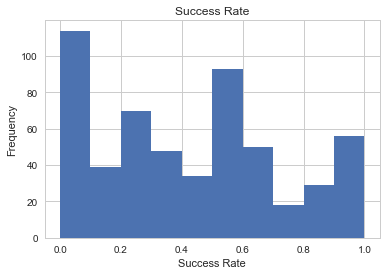

In [119]:
# create histogram
plt.hist(success_rate)
plt.title("Success Rate")
plt.xlabel("Success Rate")
plt.ylabel("Frequency")
plt.show()

## Statistical Modeling

### Importance of Different Attributes
>These paired box plots show how important each attribute is in finding a romantic partner.
Green represents ratings where participants indicated that they would go on a second date with their partner,
where yellow represents ratings where they would not.
For every attribute except for **ambition**, the 'yes' to second date responses had higher ratings.

>Out of all of these attributes, this would indicate that **ambition** is the least important in finding a partner.

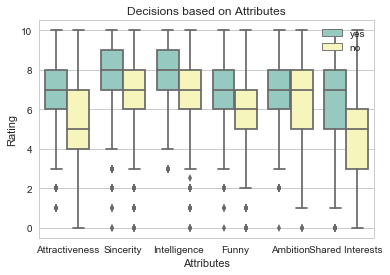

In [120]:
# select participant's ratings of partner for each attribute
# rename columns (friendly names for graph)
attri = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'dec']
data_select = data[attri]
data_select.columns = ["Attractiveness", "Sincerity", "Intelligence", "Funny", "Ambition", "Shared Interests", "Decision"]

# reshape data to have decision be the key
# rename decision column (friendly names for graph legend)
shaped = pd.melt(data_select, id_vars=['Decision'], value_name='score')
shaped['Decision'] = shaped['Decision'].map({1: 'yes', 0: 'no'})

# create boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(x="variable", y="score", hue="Decision",
                data=shaped, palette="Set3")
ax.set_title('Decisions based on Attributes')
ax.set_ylabel('Rating')
ax.set_xlabel('Attributes')
plt.legend(loc='upper right')
plt.show()

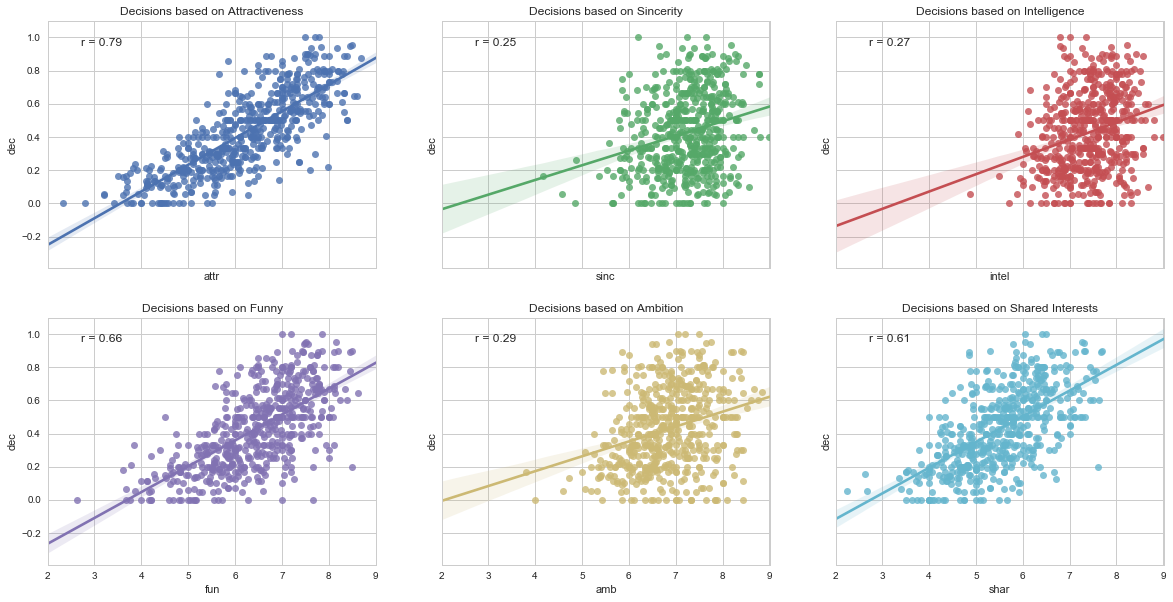

In [121]:
# import linear model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# takes in the column name for an attribute
# returns the mean values of that attribute for each partner 
# returns the mean value of whether or not participants would go on a second date with that partner
def linreg(col):
    mean_attr = data.groupby('pid')[col].mean()
    dec_attr = data.groupby('pid')['dec'].mean()
    lm = linear_model.LinearRegression()
    lm = lm.fit(mean_attr.reshape(-1,1), dec_attr.reshape(-1, 1))
    pred = lm.predict(mean_attr.reshape(-1, 1))
    return mean_attr, dec_attr, pred, math.sqrt(lm.score(mean_attr.reshape(-1, 1), dec_attr.reshape(-1, 1)))

# Feature lists
feature_names = ["Attractiveness", "Sincerity", "Intelligence", "Funny", "Ambition", "Shared Interests", "Decision"]
feature_list = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
# Mutltiple subplots for each attribute
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), sharex=True, sharey=True)
axes.flat
# Enumerate through all the attributes running the linreg() function
for index, col in enumerate(feature_list):
    # assign variables from function locally
    mean_attr, dec_attr, pred, text = linreg(col)
    # Generate subplot based on variables
    sns.regplot(x=mean_attr, y=dec_attr, ax=axes.flat[index])
    # Annotate plot title and r value
    axes.flat[index].annotate("r = {:.2f}".format(text), xy=(.1, 0.9), xycoords=axes.flat[index].transAxes)
    axes.flat[index].set_title('Decisions based on ' + feature_names[index])
plt.show()

### Race as a Dating Factor

In [122]:
def getRaceHeatMap(race_features, title, gender = -1):
    race_data = data.copy()
    if gender != -1:
        race_data = race_data[race_data['gender'] == gender]
    race_data = race_data[race_features]
    race_exp = race_data[race_data['race'] != 6].dropna()
    race_match = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
                  2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
                  3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
                  4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
    race_count = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
                  2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
                  3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
                  4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
    for row in race_exp.iterrows():
        race = row[1][race_features[0]]
        race_o = row[1][race_features[1]]
        match = row[1][race_features[2]]
        if ((race != 6.0) & (race != 5.0) & (race_o != 5.0) & (race_o != 6.0)):
            race_match[race][race_o] += match
            race_count[race][race_o] += 1
    race_match_df = np.divide(pd.DataFrame.from_dict(race_match), pd.DataFrame.from_dict(race_count))
    race_match_df.columns = ['Black/African American', 'European/Caucasian', 'Latino/Hispanic', 'Asian']
    mask = np.zeros_like(race_match_df)
    ax = plt.axes()
    with sns.axes_style("white"):
        sns.heatmap(race_match_df, mask=mask, annot=True, cmap="YlGnBu", yticklabels = race_match_df.columns)

    ax.set_title(title)
    plt.show()

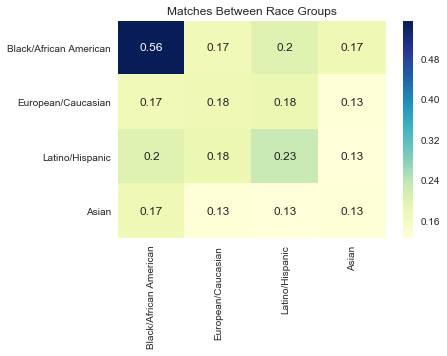

In [123]:
getRaceHeatMap(['race', 'race_o', 'match'], 'Matches Between Race Groups')

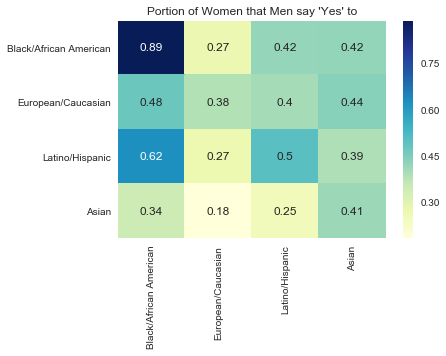

In [124]:
getRaceHeatMap(['race', 'race_o', 'dec'], 'Portion of Women that Men say \'Yes\' to', gender = 0)

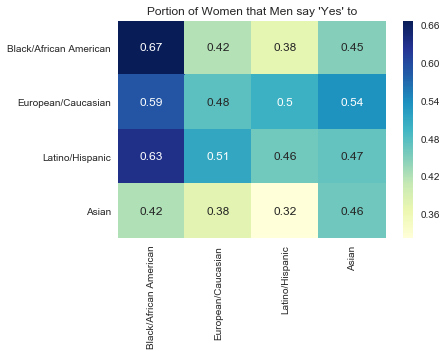

In [125]:
getRaceHeatMap(['race', 'race_o', 'dec'], 'Portion of Women that Men say \'Yes\' to', gender = 1)

### Self-perception vs Reality

> Below are some graphs plotted to describe how an attribute's rating changes when a participant has rating himself/herslef on the stated attribute plotted against the same attributes rating for the participant given by his/her partners during the experiment. 
The size of the bubbles indicate how many people fall into that particular pair of rating (self rating, real rating)

In [126]:
def prep(attribute, total):
    total[attribute+'_you'] = [0]*len(total.iloc[:, 1])
    d = {}
    for i in range(10):
        d[i + 1] = {}
        for j in range(10):
            d[i + 1][j + 1] = 0
    for index in total.index:
        think1 = total.loc[index, attribute+'5_1']
        think2 = total.loc[index, attribute+'3_1']
        if math.isnan(think1) & math.isnan(think2):
            total.loc[index, attribute+'_you'] = float('nan')
        elif math.isnan(think1):
            total.loc[index, attribute+'_you'] = think2
        elif math.isnan(think2): 
            total.loc[index, attribute+'_you'] = think1
        else:
            total.loc[index, attribute+'_you'] = round((think1+think2)/2)
        total.loc[index, attribute+'_o'] = round(total.loc[index, attribute+'_o'])
    total = total.drop([attribute+'5_1', attribute+'3_1'], axis = 1)
    total = total.sort_values(by=attribute+'_you')
    total = total.reset_index()
    total = total.dropna()
    for index, row in total.iterrows():
        you = total.loc[index, attribute+'_you']
        other = total.loc[index, attribute+'_o']
        d[you][other] += 1
    total['count'] = [0]*len(total.iloc[:, 1])
    for index, row in total.iterrows():
        you = total.loc[index, attribute+'_you']
        other = total.loc[index, attribute+'_o']
        total.loc[index, 'count'] = (float)(math.pow((2*d[you][other]), 1.5))
    return total

def plot(attribute, total):
    plt.figure(figsize = (6,6))
    plt.scatter(total[attribute+'_you'], total[attribute+'_o'],s = total['count'])
    plt.plot(range(1,11), range(1,11), c = 'red', alpha = 0.5)
    plt.ylabel('Average scores of partner rating')
    plt.xlabel('Average score of self assessment')
    return plt

def dist(attribute, gender):
    males = data[data['gender'] == gender]
    others_see_you = pd.DataFrame(males.groupby('iid')[attribute + '5_1'].mean())
    you_see_yourself = pd.DataFrame(males.groupby('iid')[attribute + '3_1'].mean())
    others_rated_you = pd.DataFrame(males.groupby('iid')[attribute + '_o'].mean())
    total = others_see_you.join(you_see_yourself)
    total = total.join(others_rated_you)
    total = prep(attribute, total)
    plot(attribute, total)

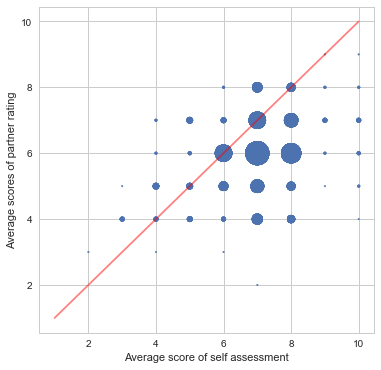

In [127]:
## This method takes an attribute to be examined and a gender to be examined on
## 1 indicating male and 0 indicating female
dist('attr', 1)

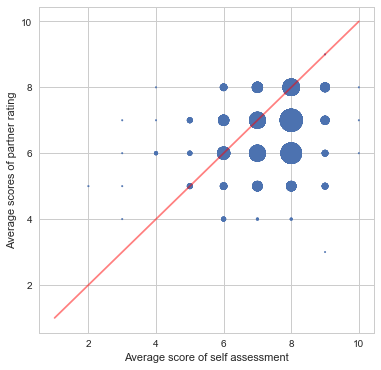

In [128]:
dist('attr', 0)

## Machine Learning : Predicting a participants final decision

In [129]:
# Lets have a look at our data again
data.head()

,iid,pid,gender,order,age,age_o,imprace,race,race_o,samerace,...,attr5_1,fun5_1,sinc5_1,amb5_1,intel5_1,attr3_1,fun3_1,sinc3_1,amb3_1,intel3_1
0,1,11.0,0,4,21.0,27.0,2.0,4.0,2.0,0,...,NaN,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0
1,1,12.0,0,3,21.0,22.0,2.0,4.0,2.0,0,...,NaN,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0
2,1,13.0,0,10,21.0,22.0,2.0,4.0,4.0,1,...,NaN,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0
3,1,14.0,0,5,21.0,23.0,2.0,4.0,2.0,0,...,NaN,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0
4,1,15.0,0,7,21.0,24.0,2.0,4.0,3.0,0,...,NaN,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0


In [130]:
data.columns

Index(['iid', 'pid', 'gender', 'order', 'age', 'age_o', 'imprace', 'race',
       'race_o', 'samerace', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'int_corr',
       'dec', 'dec_o', 'match', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'field_cd', 'wave', 'attr5_1', 'fun5_1', 'sinc5_1',
       'amb5_1', 'intel5_1', 'attr3_1', 'fun3_1', 'sinc3_1', 'amb3_1',
       'intel3_1'],
      dtype='object')

### Overview
> Our data is formatted as _paired data_. Each row represent's one participants's experience in one round of a speed dating, where we have the following information: 
- **iid**: the participants's unique ID number
- **pid**: the unique ID number of their partner during that round.
- **gender**:
- **order**:
- **age**
- **age_o**
- **imprace**: how important is it to date a partner of the same race? (scale of 1-10)
- **race**:
- **race_o**:
- **samerace**: participant and partner were the same race (0=no, 1=yes)
- **dec**: the participant's decision to see partner again (0=no, 1=yes)
- **dec_o**: partner's decision to see participant again (0=no, 1=yes)
- **match**: both partners decided to see each other again (0=no, 1=yes)

> There are many columns that are repeated throughout the dataset, which represent different attributes of participants:
- Attractiveness "attr"
- Sincerity "sinc"
- Intelligence "intel"
- Funny "fun"
- Ambition "amb"
- Shared Interests "shar"

> Suffixes are added to each attribute which mean the following:  
> (Formatted so that _attribute_ is the shortened name of the attribute)
- **_attribute_** : the participant's rating of their partner (scale of 1-10)
- **_attribute_\_o**: the partner's rating of this person (scale of 1-10)
- **_attribute_\_1_1**: what participant looks for in a partner (given 100 points to distribute among all 6 attributes)
- **_attribute_\_2_1**: what the participant thinks the opposite sex looks for in a partner (given 100 points to distribute among all 6 attributes)
- **_attribute_\_3_1**: what the participant thinks of himself in that category (given 100 points to distribute among all 6 attributes)
- **_attribute_\_5_1**: what the participant thinks others percieve him in that category (given 100 points to distribute among all 6 attributes)

In [163]:
to_keep = ['age', 'age_o', 'imprace', 'race', 'race_o', 'samerace', \
                 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', \
                 'shar_o',  'int_corr', 'dec', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', \
                 'amb1_1', 'shar1_1', 'field_cd', 'wave']
features = data[to_keep]
target = 'dec'
features = features.dropna()
features.head()

,age,age_o,imprace,race,race_o,samerace,attr,sinc,intel,fun,...,int_corr,dec,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,field_cd,wave
0,21.0,27.0,2.0,4.0,2.0,0,6.0,9.0,7.0,7.0,...,0.14,1,15.0,20.0,20.0,15.0,15.0,15.0,1.0,1
1,21.0,22.0,2.0,4.0,2.0,0,7.0,8.0,7.0,8.0,...,0.54,1,15.0,20.0,20.0,15.0,15.0,15.0,1.0,1
2,21.0,22.0,2.0,4.0,4.0,1,5.0,8.0,9.0,8.0,...,0.16,1,15.0,20.0,20.0,15.0,15.0,15.0,1.0,1
3,21.0,23.0,2.0,4.0,2.0,0,7.0,6.0,8.0,7.0,...,0.61,1,15.0,20.0,20.0,15.0,15.0,15.0,1.0,1
4,21.0,24.0,2.0,4.0,3.0,0,5.0,6.0,7.0,7.0,...,0.21,1,15.0,20.0,20.0,15.0,15.0,15.0,1.0,1


In [164]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(features, test_size=0.2)

In [165]:
# check distribution of yes and no as decision
dec_yes = train[train['dec'] == 1]
dec_no = train[train['dec'] == 0]
majority_dec = 0
if len(dec_yes) > len(dec_no) :
    majority_dec = 1

pred = [majority_dec]*len(test)

from sklearn.metrics import accuracy_score
accuracy_score(pred, test['dec'])

0.5484978540772533

In [166]:
# Running a simple logistic regression model

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train.drop(target, axis = 1), train[target])
pred = clf.predict(test.drop(target, axis = 1))
accuracy_score(pred, test[target])

0.7424892703862661

In [168]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(1000)
clf.fit(train.drop(target, axis = 1), train[target])
pred = clf.predict(test.drop(target, axis = 1))
accuracy_score(pred, test[target])

0.784549356223176

## Creating a recommendation engine 

> The next step is to find the best participant who's attributes most closely match the desired attributes for each particpant
The important point to consider is that not only should the partner be a good fit for the prticipant but also vice verse. 

My first step is to create a matrix (or dataframe) where each row (or datapoint) is a single participant and the columns are their desired attribute rating. 
```[desired_attr, desired_sinc, desired_intel, desired_fun, desired_amb, desired_share]```

Lets first convert all attribute rating to the same format. 

In [ ]:
desired = data[['iid', 'attr1_1', 'sinc1_1', 'intel1_1', 'amb1_1', 'shar1_1']].dropna()